# Folded cascode stage

In [1]:
import schemdraw as schem
import schemdraw.elements as e

######  Overzicht


###### Theoretical folded cascode configuration

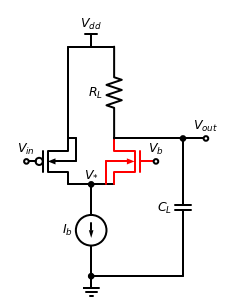

In [4]:
d = schem.Drawing()
T1 = d.add(e.SourceI, d='down',label='$I_{b}$' )
d.add(e.GND, xy=T1.end)
central=d.add(e.DOT, xy=T1.start,label='$V_{*}$')

d.add(e.LINE, xy=central.start, d='left', l=0.75)
T2 = d.add(e.PFET,bulk=True)

d.add(e.LINE, xy=central.start, d='right', l=0.75)
T3 = d.add(e.NFET,bulk=True,flip=True,color='red')
d.add(e.Resistor,xy=T3.source, d='up', label='$R_{L}$')
d.add(e.LINE, d='left', l=0.75)
vdd=d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE, xy=T2.drain, d='up',toy=vdd.start)
d.add(e.LINE,  d='right',tox=vdd.start)

d.add(e.LINE,xy=T3.source, d='right',l=2.25)
out=d.add(e.DOT)
d.add(e.Capacitor,toy=T1.end, d='down', label='$C_{L}$')
d.add(e.LINE, d='left', tox=T1.end)
d.add(e.DOT)

# bulk connections only T2 and T3

d.add(e.LINE, xy=T2.bulk, d='right', l=0.25)
d.add(e.LINE, toy=T2.drain, d='up')
d.add(e.LINE, tox=T2.drain, d='left')

d.add(e.LINE, xy=T3.bulk, d='left', l=0.25,color='red')
d.add(e.LINE, toy=central.start, d='down',color='red')

# labels

d.add(e.DOT_OPEN, xy=T2.gate, label='$V_{in}$')
d.add(e.DOT_OPEN, xy=T3.gate, label='$V_{b}$')
d.add(e.LINE, d='right',xy=out.start, l=0.75)
d.add(e.DOT_OPEN,  label='$V_{out}$')
d.draw()

In {numref}`Afig1` we also add a cascode transistor (in red) between the input transistor and the output node. This corresponds as a consequence to a classical cascode stage. However, there is one major difference: the cascode transistor is of the opposite polarity when compared to the input transistors. In {numref}`Afig1` the input transistor is a pMOS tranistor and the cascode transistor is an nMOS transitor. Obviously, this also alters the current flow, and in order to maintain the current flow between power ($V_{dd}$) and ground, an addition current source ($I_b$) needs to be added. 

For the practical implementation of this folded cascode, we replace the current source ($I_b$) with the transistor $T_3$, as can be seen in {numref}`Afig2`.

The amplication of this simple folded cascode amplifier stage is defined by:

* the $g_m$ of the input transitor $T_1$
* the conductance of the load resistor $g_L$
* the output conductance of the folded cascode stage $g_{casc}$
* the capacitive load $C_L$

$$ A=\frac{g_{m1}}{g_L+g_{casc}+j \omega C_L}  $$

###### Practical folded cascode amplifier stage configuration

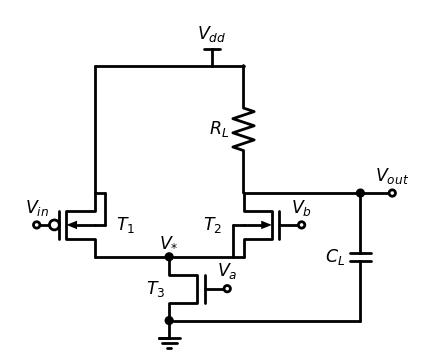

In [6]:
d = schem.Drawing()
T3 = d.add(e.NFET, label='$T_{3}$' )
d.add(e.GND, xy=T3.source)
central=d.add(e.DOT, xy=T3.drain,label='$V_{*}$')

d.add(e.LINE, xy=central.start, d='left', l=1.75)
T1 = d.add(e.PFET(bulk=True).label('$T_{1}$',loc='right', ofst=0.5))

d.add(e.LINE, xy=central.start, d='right', l=1.75)
T2 = d.add(e.NFET(bulk=True,flip=True).label('$T_{2}$',loc='left', ofst=0.5))
d.add(e.Resistor,xy=T2.source, d='up', label='$R_{L}$')
d.add(e.LINE, d='left', l=0.75)
vdd=d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE, xy=T1.drain, d='up',toy=vdd.start)
d.add(e.LINE,  d='right',tox=vdd.start)

d.add(e.LINE,xy=T2.source, d='right',l=2.75)
out=d.add(e.DOT)
d.add(e.Capacitor,toy=T3.source, d='down', label='$C_{L}$')
d.add(e.LINE, d='left', tox=T3.source)
d.add(e.DOT)

# bulk connections only T2 and T1

d.add(e.LINE, xy=T1.bulk, d='right', l=0.25)
d.add(e.LINE, toy=T1.drain, d='up')
d.add(e.LINE, tox=T1.drain, d='left')

d.add(e.LINE, xy=T2.bulk, d='left', l=0.25)
d.add(e.LINE, toy=central.start, d='down')

# labels

d.add(e.DOT_OPEN, xy=T1.gate, label='$V_{in}$')
d.add(e.DOT_OPEN, xy=T2.gate, label='$V_{b}$')
d.add(e.DOT_OPEN, xy=T3.gate, label='$V_{a}$')
d.add(e.LINE, d='right',xy=out.start, l=0.75)
d.add(e.DOT_OPEN,  label='$V_{out}$')
d.draw()

The important next step is obviously the determination fo $g_{casc}$. We use {numref}`Afig3` for elaborating this output impedance. 

###### Circuit block under consideration for measuring the folded cascode output impedance

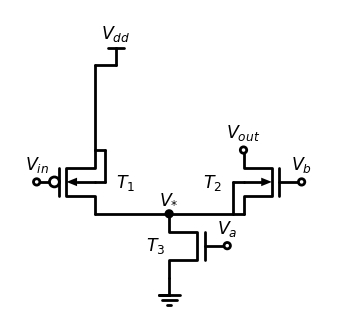

In [7]:
d = schem.Drawing()
T3 = d.add(e.NFET, label='$T_{3}$' )
d.add(e.GND, xy=T3.source)
central=d.add(e.DOT, xy=T3.drain,label='$V_{*}$')

d.add(e.LINE, xy=central.start, d='left', l=1.75)
T1 = d.add(e.PFET(bulk=True).label('$T_{1}$',loc='right', ofst=0.5))

d.add(e.LINE, xy=central.start, d='right', l=1.75)
T2 = d.add(e.NFET(bulk=True,flip=True).label('$T_{2}$',loc='left', ofst=0.5))


d.add(e.LINE, xy=T1.drain, d='up',l=2)
d.add(e.LINE,  d='right',l=0.5)
vdd=d.add(e.VDD, label='$V_{dd}$')


d.add(e.DOT_OPEN, xy=T2.source, label='$V_{out}$')

# bulk connections only T2 and T1

d.add(e.LINE, xy=T1.bulk, d='right', l=0.25)
d.add(e.LINE, toy=T1.drain, d='up')
d.add(e.LINE, tox=T1.drain, d='left')

d.add(e.LINE, xy=T2.bulk, d='left', l=0.25)
d.add(e.LINE, toy=central.start, d='down')

# labels

d.add(e.DOT_OPEN, xy=T1.gate, label='$V_{in}$')
d.add(e.DOT_OPEN, xy=T2.gate, label='$V_{b}$')
d.add(e.DOT_OPEN, xy=T3.gate, label='$V_{a}$')
d.draw()